In [1]:
from nnutils import *
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
def get_params_from_npz(path):
    x = np.load(path)
    return zip(*sorted(x.items(), key=lambda x: int(x[0].split('_')[1])))[1]

In [47]:
params1 = get_params_from_npz('params1.npz')

In [48]:
params1[0].shape

(3, 3, 9, 20)

In [6]:
params1[0].reshape((81,20))

array([[-0.0806554 ,  0.01498045, -0.02607494, ..., -0.15883458,
        -0.18555762,  0.1510797 ],
       [-0.0578809 , -0.02488965,  0.03404938, ..., -0.02869038,
         0.08161558, -0.01252501],
       [-0.03981233, -0.06347506, -0.06965202, ...,  0.01295937,
         0.08618689,  0.02618172],
       ..., 
       [-0.18451862,  0.09019991,  0.24468374, ..., -0.0422467 ,
        -0.03564261,  0.09793284],
       [ 0.02433072,  0.0830958 ,  0.21040794, ...,  0.1978402 ,
         0.02464171, -0.09586097],
       [ 0.06395023, -0.01734813,  0.0027515 , ..., -0.05269688,
         0.04719783,  0.10676685]], dtype=float32)

In [12]:
import scipy

### WConv1

In [49]:
#singular_values = np.zeros((9,9))
#for i in range(9):
#    a1 = params1[0][:,:,i,:].reshape(9,20)
#    _, s, _ = scipy.linalg.svd(a1)
#    singular_values[i,:] = s
wconv1 = params1[0].reshape((81,20))
U, s, Vh = np.linalg.svd(wconv1.T)

<Container object of 3 artists>

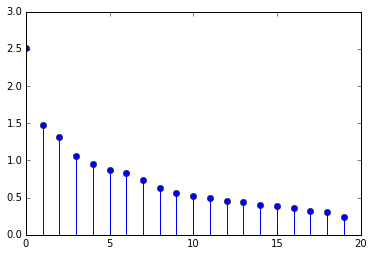

In [50]:
plt.stem(s)

In [51]:
U.shape

(20, 20)

In [52]:
Vh.shape

(81, 81)

In [53]:
s.max(),s.min(), s.mean(), s.std()

(2.5091379, 0.236166, 0.74345338, 0.52362996)

### WConv2

In [54]:
params1[2].shape

(3, 3, 20, 40)

In [55]:
wconv2 = params1[2].reshape((180,40))
U, s, Vh = np.linalg.svd(wconv2.T)

<Container object of 3 artists>

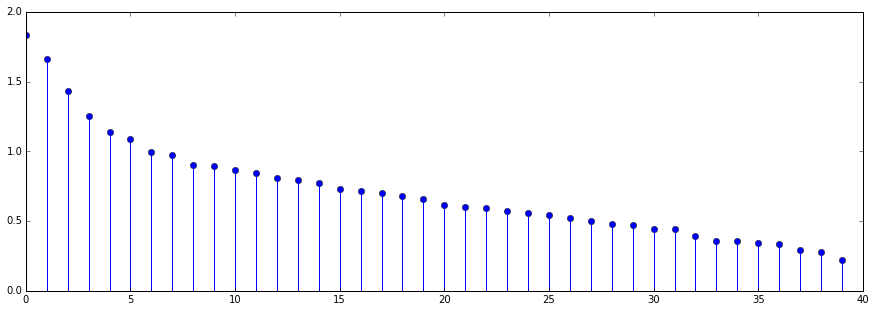

In [56]:
plt.figure(figsize=(15,5))
plt.stem(s.flatten())

In [57]:
s.max(),s.min(), s.mean(), s.std()

(1.8370005, 0.22083923, 0.71660459, 0.36287561)

### WConv3

In [58]:
params1[4].shape

(3, 3, 40, 80)

In [59]:
wconv3 = params1[4].reshape((360,80))
U, s, Vh = np.linalg.svd(wconv3.T)

<Container object of 3 artists>

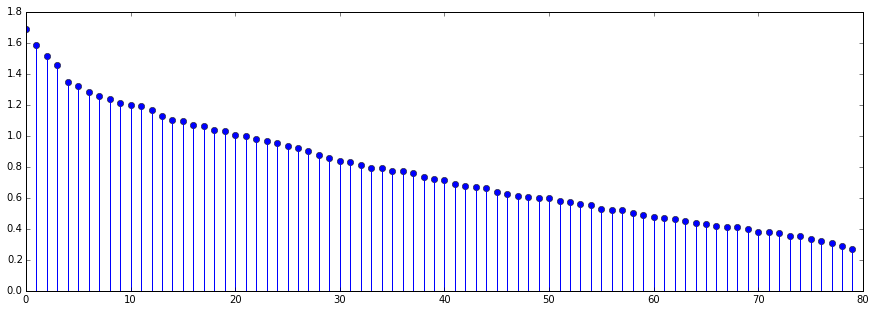

In [60]:
plt.figure(figsize=(15,5))
plt.stem(s.flatten())

In [61]:
s.max(),s.min(), s.mean(), s.std()

(1.689106, 0.27221695, 0.77290523, 0.34065279)

### WConv4

In [62]:
params1[6].shape

(3, 3, 80, 150)

In [63]:
wconv4 = params1[6].reshape((720,150))
U, s, Vh = np.linalg.svd(wconv4.T)

<Container object of 3 artists>

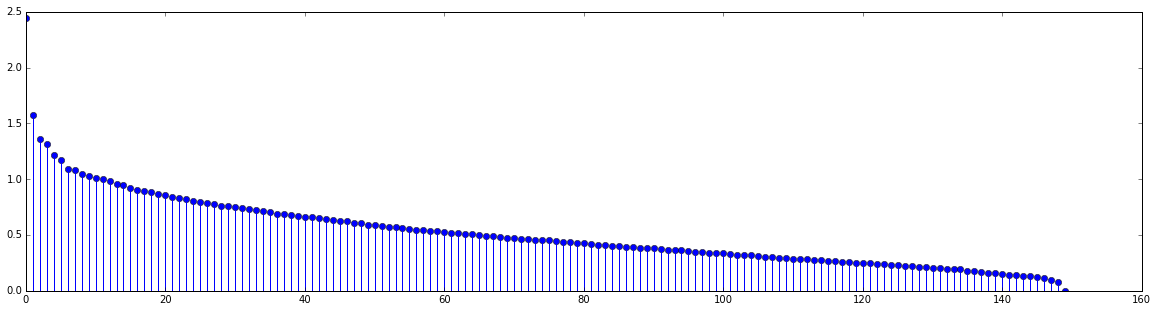

In [64]:
plt.figure(figsize=(20,5))
plt.stem(s.flatten())

In [65]:
np.argmax(s < 0.01)

149

In [66]:
s.max(),s.min(), s.mean(), s.std()

(2.4475589, 1.0869345e-15, 0.52017057, 0.33179194)

### WConv5

In [67]:
params1[8].shape

(1, 1, 150, 150)

In [68]:
wconv5 = params1[8].reshape((150,150))
U, s, Vh = np.linalg.svd(wconv5.T)

<Container object of 3 artists>

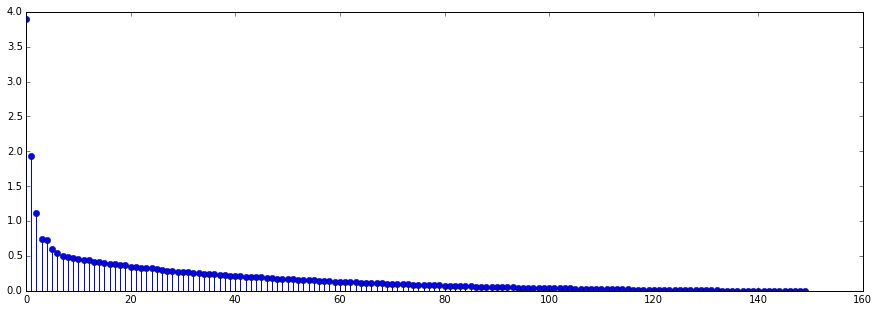

In [69]:
plt.figure(figsize=(15,5))
plt.stem(s.flatten())

In [70]:
np.argmax(s < 0.01)

124

In [71]:
s.max(),s.min(), s.mean(), s.std()

(3.8968859, 2.7588236e-16, 0.18603061, 0.37893432)

### Softmax Output Layer

In [72]:
params1[10].shape

(150, 600)

In [73]:
U, s, V = np.linalg.svd(params1[10].T, full_matrices=False)

<Container object of 3 artists>

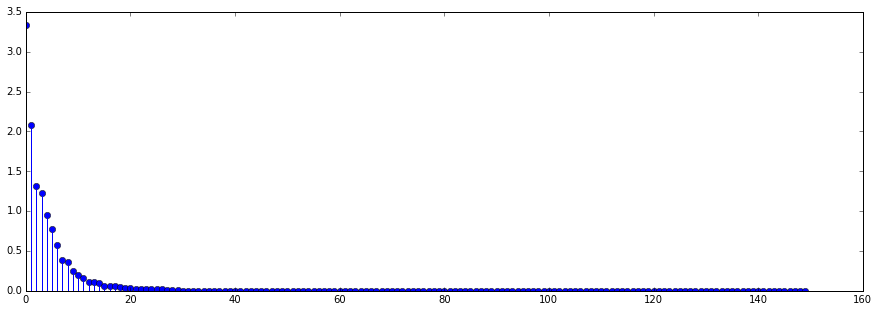

In [74]:
plt.figure(figsize=(15,5))
plt.stem(s)

In [75]:
s.max(),s.min(), s.mean(), s.std()

(3.3378618, 4.3835189e-09, 0.0826777, 0.36506644)

In [76]:
s[45:50]

array([ 0.00020578,  0.00019157,  0.00017452,  0.00015214,  0.00013266], dtype=float32)

In [78]:
np.argmax(s<0.01)

27

In [83]:
s[30]

0.0025447658

In [254]:
sum(s[30:]**2)/sum(s**2)

8.098771240290452e-05

In [243]:
V.shape

(150, 150)

In [246]:
U.shape

(600, 150)

### Can replace the output layer with an low_rank x 600 layer (low_rank less than 150), by changing basis using the V matrix, and throwing away the dimensions with low singular values, then changing U to be a 600 x low_rank layer

In [ ]:
def low_rank_approx(A, r=1):
    u, s, v = np.linalg.svd(A)
    Ar = np.zeros((len(u),len(v)))
    #Ar = np.zeros((r,r))
    for i in xrange(r):
        Ar += s[i] * np.outer(u.T[i], v[i])
    return Ar

In [182]:
def low_rank_approx(A, r=1):
    u, s, v = np.linalg.svd(A)
    Ar = np.zeros((len(u),len(v)))
    #Ar = np.zeros((r,r))
    for i in xrange(r):
        Ar += s[i] * np.outer(u.T[i], v[i])
    return Ar

In [183]:
low_rank = low_rank_approx(params1[10], 10)

In [225]:
from scipy.misc import lena
x = lena()

low_lena = low_rank_approx(x, 60)

6.84025325194


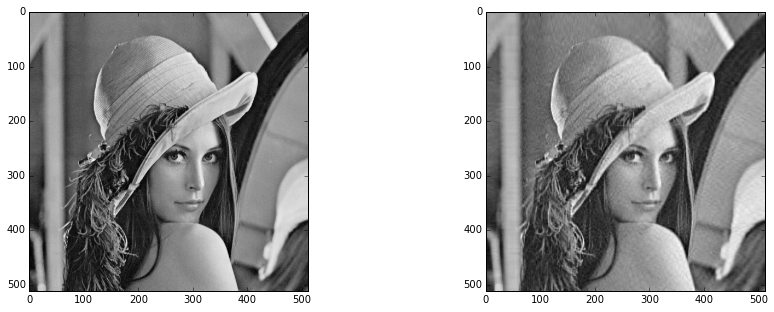

In [226]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.imshow(x, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(low_lena, cmap='gray')

print np.sqrt(np.mean(np.mean(np.square(x-low_lena), axis=0)))

In [164]:
u, s, v = np.linalg.svd(params1[10], full_matrices=False)

In [165]:
u.shape

(150, 150)

In [166]:
v.shape

(150, 600)

In [286]:
n = 5100
binomial = scipy.stats.binom(n, 0.5)

<Container object of 3 artists>

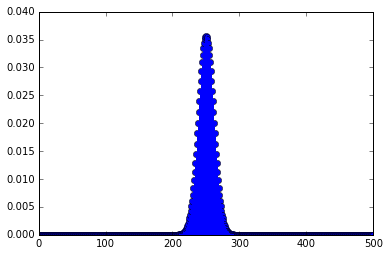

In [287]:
plt.stem([binomial.pmf(i) for i in range(n)])